# Phase Diagram of HK and HKL Model in Two Dimensions

## 1. Find $\mu(\rho)$

### Setup

In [11]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

t = 1
d = 2

def I_1(x):
    if np.abs(x) <= 2*t:
        result = np.heaviside(x + 2*t, 1) - (1 / np.pi) * np.arccos(x / (2*t))
    else:
        result = np.heaviside(x + 2*t, 1)
    return result

def I_2(x):
    def I_1_shifted(k):
        return I_1(x + 2*t*np.cos(k))
    
    integral_value = integrate.quad(I_1_shifted, -np.pi, np.pi)
    
    return integral_value[0] / (2*np.pi)

def rho_hk_2d(mu, U):
    if U >= 0:
        return I_2(mu) + I_2(mu - U)
    elif U < 0:
        return 2 * I_2(mu - U/2)

def find_mu_of_rho_hk(rho, U):
    bracket = (-2*t*d, U + 2*t*d) # minimal and maximal values of mu
    func_mu = lambda mu: rho_hk_2d(mu, U) - rho
    result = root_scalar(func_mu, bracket=bracket, method='brentq')

    if result.converged:
        return result.root
    else:
        raise RuntimeError(f"Keine Nullstelle gefunden für rho={rho}")

def create_mu_list(rho_array, U):
    mu_values = []
    for rho_i in rho_array:
        print(f'\rProgress: {(rho_i/2 * 100):.1f}%{' ' * 20}', end="", flush=True)
        try:
            mu = find_mu_of_rho_hk(rho_i, U)
            mu_values.append(mu)
        except RuntimeError:
            mu_values.append(np.nan)
            print(f"Keine Nullstelle gefunden für rho={rho_i}")
    return mu_values

def one_plot(x_array, y_array,x_label, y_label, title):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.title(title)
    plt.show()

#### Testing Setup

Progress: 25.4%                    

/tmp/ipykernel_2813/1791302549.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_value = integrate.quad(I_1_shifted, -np.pi, np.pi)


Progress: 99.9%                    

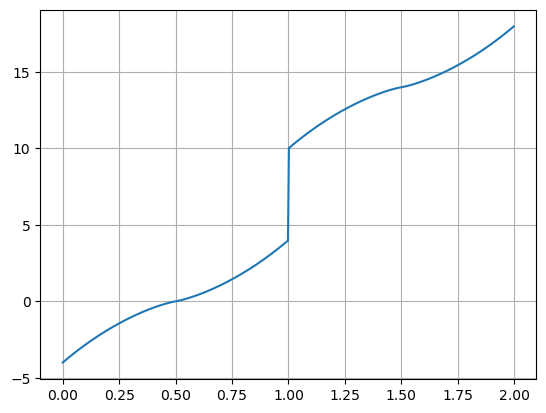

In [12]:
rho_values = np.linspace(0, 2, 1000, endpoint=False)

mu_values = create_mu_list(rho_values, 14)

one_plot(rho_values, mu_values, '','','')

## 2. Find $U_c(\rho)$

### Setup

In [13]:
def find_U_c_of_rho(rho):
    if rho <= 1:
        func_U = lambda U: find_mu_of_rho_hk(rho, U) + 2*t*d - U
        result = root_scalar(func_U, bracket=(0, 4*t*d), method='bisect')
    elif rho > 1:
        func_U = lambda U: find_mu_of_rho_hk(rho, U) - 2*t*d
        result = root_scalar(func_U, bracket=(0, 4*t*d), method='bisect')

    if result.converged:
        return result.root
    else:
        print(result.flag)
        raise RuntimeError(f"Keine Nullstelle gefunden für rho={rho}")
    
def create_U_c_array(rho_array):
    U_c_list = []

    for rho_i in rho_array:
        print(f'\rProgress: {(rho_i/2 * 100):.1f}%{' ' * 20}', end="", flush=True)
        try:
            U_i = find_U_c_of_rho(rho_i)
            U_c_list.append(U_i)
        except RuntimeError:
            U_c_list.append(np.nan)
            print(f"Keine Nullstelle gefunden für rho={rho_i}")

    U_c_array = np.array(U_c_list)

    return U_c_array

### Calculation

In [14]:
U_c_hk = create_U_c_array(rho_values)

Progress: 25.0%                    

/tmp/ipykernel_2813/1791302549.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_value = integrate.quad(I_1_shifted, -np.pi, np.pi)


Progress: 99.9%                    

#### Save the List!

In [19]:

U_c_hk_copy = [0.0, 
0.02509328349515272, 
0.05010773383946798, 
0.07504347799294919, 
0.09990062856923032, 
0.12467931935861998, 
0.14937966791148938, 
0.17400179712967656, 
0.19854582542575372, 
0.2230118802999641, 
0.2474000771962892, 
0.27171053548408963, 
0.2959433748565061, 
0.3200987274194631, 
0.34417669572394516, 
0.36817740256265097, 
0.39210096902206715, 
0.41594751081174763, 
0.4397171474283823, 
0.46340999312997155, 
0.4870261659834796, 
0.5105657812291611, 
0.5340289405958174, 
0.5574158011786494, 
0.5807264357445092, 
0.603960972139248, 
0.6271195243807597, 
0.6502022073127591, 
0.6732091290778044, 
0.6961404087032861, 
0.7189961482999934, 
0.741776470653349, 
0.7644814789910015, 
0.7871112863049348, 
0.8096660055471148, 
0.8321457416477642, 
0.854550604160977, 
0.8768807023170666, 
0.8991361459720792, 
0.9213170401944808, 
0.9434234957279841, 
0.9654556106524979, 
0.9874134996007342, 
1.0092972747534077, 
1.0311070107618434, 
1.0528428449633793, 
1.07450486585185, 
1.0960931802601408, 
1.1176078908229101, 
1.139049100844204, 
1.1604169092006487, 
1.1817114198183845, 
1.2029327325381018, 
1.224080943642548, 
1.245156157436213, 
1.26615843491345, 
1.287087983893798, 
1.307944789821704, 
1.32872899308677, 
1.349440680567568, 
1.3700799585694767, 
1.3906469165722228, 
1.4111416465730144, 
1.4315642500678223, 
1.4519148092058458, 
1.472193431609412, 
1.492400199162148, 
1.5125352025734173, 
1.5325985361250787, 
1.552590292523746, 
1.572510558014983, 
1.5923594198629871, 
1.612136969290077, 
1.6318432916250458, 
1.651478473950192, 
1.6710426020672458, 
1.6905357611813088, 
1.709958037992692, 
1.7293095112818264, 
1.7485902678072307, 
1.7678003980599897, 
1.7869399579449237, 
1.806009051584624, 
1.8250077528118709, 
1.8439361391483544, 
1.8627942872935819, 
1.8815822832748381, 
1.9003001888104336, 
1.9189480912482395, 
1.9375260630495177, 
1.956034177210313, 
1.9744725036562158, 
1.9928411202981806, 
2.0111400954174314, 
2.0293695003729226, 
2.0475294027364725, 
2.0656198736960505, 
2.0836409786006698, 
2.1015927863936668, 
2.1194753595937073, 
2.137288765379708, 
2.155033065509997, 
2.1727083229652635, 
2.190314599951307, 
2.2078519325568777, 
2.225320448209459, 
2.242720144431587, 
2.2600510924003174, 
2.277313346048686, 
2.2945069649813377, 
2.311632005907086, 
2.328688514769965, 
2.3456765455612185, 
2.3625961490488407, 
2.379447372373761, 
2.396230261785604, 
2.41294486701554, 
2.429591231108134, 
2.4461693934190407, 
2.4626794045998395, 
2.4791212963773432, 
2.4954951141899073, 
2.5118008925655886, 
2.5280386676149647, 
2.544208475295818, 
2.560310347822451, 
2.5763443170089886, 
2.5923104199009686, 
2.608208663585174, 
2.6240390942093654, 
2.6398017337360216, 
2.655496602294079, 
2.671123728801831, 
2.686683111691309, 
2.702174789947094, 
2.71759877171462, 
2.7329550713675417, 
2.7482437013732124, 
2.7634646706119383, 
2.778617985686651, 
2.7937036561797868, 
2.8087216818985326, 
2.823672065524079, 
2.838554806281536, 
2.853369898903111, 
2.868117341722609, 
2.8827971100708965, 
2.897409227780372, 
2.9119536204107135, 
2.926430371366223, 
2.940839378426972, 
2.9551806437975756, 
2.96945414106267, 
2.9836598522033455, 
2.997797738242298, 
3.0118677658629167, 
3.025869890980175, 
3.039804113434002, 
3.053670348252126, 
3.067468562754584, 
3.0811987049546588, 
3.0948607256377727, 
3.108454566607179, 
3.121980163095941, 
3.135437455095598, 
3.148826361984902, 
3.1621468307803298, 
3.1753987719512224, 
3.1885820978986885, 
3.2016967304025457, 
3.2147425766361266, 
3.22771953422307, 
3.240627508608668, 
3.2534663894093683, 
3.2662360580125096, 
3.2789364165128063, 
3.2915673241896, 
3.3041286518691777, 
3.3166202670599887, 
3.3290420268913294, 
3.341393780452563, 
3.3536753744319867, 
3.365886641362522, 
3.3780274129112513, 
3.3900975101187214, 
3.402096739546323, 
3.414024904212056, 
3.425881821573057, 
3.437667253370819, 
3.449380984349773, 
3.4610227796456456, 
3.4725923962414527, 
3.484089579209467, 
3.4955140617075813, 
3.5068655621744256, 
3.518143792238334, 
3.5293484495468874, 
3.540479209548721, 
3.551535744134526, 
3.5625177020756382, 
3.5734247194104682, 
3.584256413329058, 
3.5950123880957108, 
3.6056919982747786, 
3.6162954704650474, 
3.6268216915686935, 
3.6372703852375707, 
3.6476410520645004, 
3.6579331411539897, 
3.6681461458083504, 
3.678279425281289, 
3.6883323845340783, 
3.698304369348989, 
3.7081946894741122, 
3.718002624807923, 
3.727727406703707, 
3.7373682342968095, 
3.746924244815091, 
3.7563945337733458, 
3.7657781369434815, 
3.7750740387073165, 
3.78428114190865, 
3.793398295294537, 
3.8024242240626336, 
3.811357696993582, 
3.820197200637267, 
3.828941241308712, 
3.83758816813679, 
3.846136220263361, 
3.8545834593005566, 
3.8629277989766706, 
3.8711669574640837, 
3.8792984400806745, 
3.8873194987845636, 
3.895227097231327, 
3.9030178689590684, 
3.91068800947869, 
3.9182333379776537, 
3.925648988528337, 
3.9329294270337414, 
3.940068261073975, 
3.9470579443532188, 
3.9538895182831766, 
3.960552041820847, 
3.9670318729604332, 
3.973311436968288, 
3.979367041190926, 
3.985164702329712, 
3.9906504871669313, 
3.9957212892168172, 
4.000000000001819, 
4.004278710783183, 
4.009349512833069, 
4.014835297670288, 
4.020632958809074, 
4.026688563031712, 
4.032968127039567, 
4.039447958342862, 
4.046110481716823, 
4.052942055646781, 
4.059931738915111, 
4.067070572966259, 
4.074351011471663, 
4.081766662022346, 
4.089311990517672, 
4.096982131040932, 
4.1047729028159665, 
4.112680501215436, 
4.1207015599193255, 
4.128833042535916, 
4.137072201023329, 
4.145416540699443, 
4.153863779780295, 
4.16241183186321, 
4.171058758691288, 
4.179802799362733, 
4.188642303006418, 
4.197575775937366, 
4.206601704698187, 
4.21571885809135, 
4.2249259612926835, 
4.2342218630565185, 
4.243605465593646, 
4.253075755184909, 
4.2626317657031905, 
4.272272593296293, 
4.281997375192077, 
4.291805312435827, 
4.301695630651011, 
4.311667615374972, 
4.321720574718711, 
4.331853846853846, 
4.34206685884601, 
4.3523589479355, 
4.362729614762429, 
4.373178307863782, 
4.383704529534953, 
4.394308001725221, 
4.404987611904289, 
4.415743586670942, 
4.426575285053332, 
4.437482297924362, 
4.448464257819069, 
4.459520790451279, 
4.470651550453113, 
4.481856207761666, 
4.493134437825574, 
4.504485938292419, 
4.5159104291033145, 
4.527407603758547, 
4.538977217789579, 
4.550619015650227, 
4.562332747636901, 
4.57411817830689, 
4.585975095787944, 
4.597903260453677, 
4.609902489881279, 
4.621972587088749, 
4.634113358637478, 
4.646324625568013, 
4.658606219547437, 
4.670957973024997, 
4.683379732940011, 
4.695871348047149, 
4.708432676075972, 
4.721063583487194, 
4.733763941641882, 
4.746533610590632, 
4.759372493723276, 
4.77228046577693, 
4.785257423363873, 
4.798303280398613, 
4.811417903152687, 
4.824601229656764, 
4.837853170918606, 
4.851173631812344, 
4.864562545220906, 
4.878019831345227, 
4.891545434098589, 
4.90513927352913, 
4.9188012950016855, 
4.932531437245416, 
4.946329651085762, 
4.960195886205838, 
4.9741300965524715, 
4.988132234137083, 
5.002202261757702, 
5.016340151249096, 
5.030545868166882, 
5.044819355827713, 
5.059160620350667, 
5.073569628633777, 
5.0880463795892865, 
5.10259077090268, 
5.1172028899291035, 
5.131882661529744, 
5.146630101278788, 
5.161445195817578, 
5.176328275823835, 
5.1912783181014674, 
5.206296343165377, 
5.221382006902786, 
5.236535334783184, 
5.251756296374879, 
5.267044928687028, 
5.28240122828538, 
5.297825184776229, 
5.313316887413748, 
5.32887627817945, 
5.344503397949666, 
5.360198266555017, 
5.375960905790635, 
5.3917913363602565, 
5.4076895800990314, 
5.4236556827981985, 
5.439689651249864, 
5.455791525235327, 
5.471961332821593, 
5.488199107281616, 
5.5045048865304125, 
5.520878703378912, 
5.5373205954001605, 
5.553830606580959, 
5.570408768564448, 
5.587055132376918, 
5.603769730632848, 
5.620552627124198, 
5.637403852522766, 
5.6543234542605205, 
5.671311485230035, 
5.688367994092914, 
5.705493035018662, 
5.7226866421897284, 
5.739948915723289, 
5.757279855739398, 
5.774679551786903, 
5.792148067443122, 
5.809685400048693, 
5.8272916687874385, 
5.84496693708752, 
5.862711234532981, 
5.880524640893782, 
5.898407213602695, 
5.916359020882737, 
5.934380120974311, 
5.952470596696003, 
5.970630501446067, 
5.988859905717618, 
6.0071588795017306, 
6.025527496343784, 
6.043965824936095, 
6.062473932515786, 
6.08105190950846, 
6.099699811189566, 
6.118417716725162, 
6.137205713212097, 
6.156063861251823, 
6.174992245281828, 
6.19399094637447, 
6.213060041789504, 
6.2321995891998085, 
6.251409733666151, 
6.270690489689514, 
6.290041962007308, 
6.309464238611326, 
6.328957326621094, 
6.348521537360284, 
6.368156707225353, 
6.387863030007793, 
6.407640593230099, 
6.427489442734441, 
6.447409707596307, 
6.467401463874921, 
6.487464798023211, 
6.507599805010614, 
6.527806618612885, 
6.54808519350081, 
6.568435750274148, 
6.5888583549840405, 
6.609353085581461, 
6.62992004170701, 
6.650559326908478, 
6.671271009099655, 
6.6920552099127235, 
6.712912052304091, 
6.73384156508655, 
6.754843842873015, 
6.775919059766238, 
6.79706726846598, 
6.818288580938315, 
6.8395830907738855, 
6.860950898730152, 
6.88239210917709, 
6.903906806199302, 
6.925495134144512, 
6.947157157615948, 
6.968892989238157, 
6.990702716082524, 
7.012586455037308, 
7.034544388514405, 
7.056576515698907, 
7.07868295831031, 
7.100863825029592, 
7.123119295561992, 
7.145449389356145, 
7.16785425940725, 
7.190333993929016, 
7.212888717387614, 
7.235518522227721, 
7.258223527585869, 
7.281003850896013, 
7.30385959272644, 
7.326790884419097, 
7.349797792348909, 
7.372880475772035, 
7.396039042409029, 
7.4192735685992375, 
7.4425841984830186, 
7.465971073199398, 
7.489434224304205, 
7.512973832906937, 
7.536590020374206, 
7.5602828534701985, 
7.584052487347435, 
7.607899030919725, 
7.63182259970381, 
7.655823308943582, 
7.679901206583963, 
7.704056619897528, 
7.72828946451591, 
7.752599964265755, 
7.776988113326297, 
7.801454182686939, 
7.825998196012733, 
7.850620303337564, 
7.8753207025347365, 
7.900099370019234, 
7.924956519958869, 
7.949892265349263, 
7.974906804085549, 
8.0, 
7.974906716504847, 
7.949892266160532, 
7.924956522007051, 
7.90009937143077, 
7.87532068064138, 
7.850620332088511, 
7.825998202870323, 
7.801454174574246, 
7.776988119700036, 
7.752599922803711, 
7.72828946451591, 
7.704056625143494, 
7.679901272580537, 
7.655823304276055, 
7.631822597437349, 
7.607899030977933, 
7.584052489188252, 
7.560282852571618, 
7.5365900068700284, 
7.51297383401652, 
7.489434218770839, 
7.465971059404183, 
7.442584198821351, 
7.419273564255491, 
7.396039027860752, 
7.37288047561924, 
7.349797792687241, 
7.326790870922196, 
7.303859591296714, 
7.281003851700007, 
7.258223529346651, 
7.2355185210089985, 
7.212888713695065, 
7.190333994452885, 
7.167854258352236, 
7.145449395839023, 
7.123119297682933, 
7.100863854027921, 
7.078682959805519, 
7.056576504272016, 
7.034544389347502, 
7.012586500399266, 
6.990702725246592, 
6.968892989238157, 
6.947157155036621, 
6.925495134144512, 
6.903906819739859, 
6.88239210917709, 
6.860950899155796, 
6.839583090799351, 
6.8182885801816155, 
6.797067267461898, 
6.775919056357452, 
6.754843842563787, 
6.73384156508655, 
6.712912016106202, 
6.692055210178296, 
6.67127100691323, 
6.650559319432432, 
6.629920041430523, 
6.609353083424139, 
6.588858353423348, 
6.568435749932178, 
6.548085190794154, 
6.527806568390588, 
6.507599800837852, 
6.487464797426583, 
6.467401463874921, 
6.447409707476254, 
6.427489441985017, 
6.407640580137013, 
6.387863030709923, 
6.368156708374954, 
6.348521526049808, 
6.328957397932754, 
6.309464238818691, 
6.290041962007308, 
6.270690488718174, 
6.251409732192769, 
6.23219960194001, 
6.213060042055076, 
6.193990948411738, 
6.174992247188129, 
6.156063860851646, 
6.137205712706418, 
6.118417716725162, 
6.099699811189566, 
6.0810519087517605, 
6.062473936950482, 
6.043965822789687, 
6.025527496343784, 
6.007158879701819, 
5.988859904582569, 
5.970630499627077, 
5.9524705972635275, 
5.9343801263039495, 
5.91635902139933, 
5.898407213606333, 
5.880524640406293, 
5.862711234620292, 
5.844966934490003, 
5.8272916770347365, 
5.809685400048693, 
5.792148067443122, 
5.774679551790541, 
5.757279855568413, 
5.739948907599683, 
5.722686653951314, 
5.705493035018662, 
5.688367994092914, 
5.671311485230035, 
5.6543234544387815, 
5.637403850951159, 
5.620552627626239, 
5.603769738214396, 
5.58705513298446, 
5.570408768891866, 
5.553830606580959, 
5.5373205954001605, 
5.520878703622657, 
5.504504885810093, 
5.488199107438049, 
5.471961332385035, 
5.455791524704182, 
5.439689652177549, 
5.423655682991011, 
5.4076895800990314, 
5.391791336418464, 
5.375960905790635, 
5.360198266263978, 
5.344503397705921, 
5.328876271198169, 
5.313316888308691, 
5.297825210052906, 
5.28240122828538, 
5.267044928632458, 
5.251756298626788, 
5.236535329388062, 
5.221382014313349, 
5.206296343820213, 
5.1912783181014674, 
5.176327934475921, 
5.161445193718464, 
5.146630101096889, 
5.131882658277391, 
5.1172028899291035, 
5.102590772219628, 
5.0880463795892865, 
5.073569628633777, 
5.059160621573028, 
5.044819356202424, 
5.03054585893733, 
5.0163401477966545, 
5.002202261757702, 
4.988132234137083, 
4.974130109019825, 
4.960195886565998, 
4.946329651747874, 
4.932531437245416, 
4.918801295045341, 
4.905139274362227, 
4.891545433392821, 
4.878019836904059, 
4.864562544904402, 
4.851173638015098, 
4.83785316921967, 
4.824601228048778, 
4.8114179021013115, 
4.798303269597454, 
4.785257423360235, 
4.77228046577693, 
4.759372491391332, 
4.746533610590632, 
4.73376394198749, 
4.721063583487194, 
4.7084326758104, 
4.695871348130822, 
4.683379732940011, 
4.670957973108671, 
4.658606219547437, 
4.646324625568013, 
4.634113358637478, 
4.621972587088749, 
4.609902489881279, 
4.597903260453677, 
4.585975095787944, 
4.574118178426943, 
4.562332746629181, 
4.550619015650227, 
4.538977220354354, 
4.527407603758547, 
4.515910420790533, 
4.504485938292419, 
4.493134437825574, 
4.481856207761666, 
4.470651550453113, 
4.459520790451279, 
4.448464255865474, 
4.437482297924362, 
4.426575280589532, 
4.415743586670942, 
4.404987611904289, 
4.394308001725221, 
4.383704529534953, 
4.3731783084313065, 
4.362729614762429, 
4.3523589479355, 
4.34206685884601, 
4.33185385419165, 
4.321720574718711, 
4.311667615465922, 
4.301695630651011, 
4.291805310525888, 
4.281997375192077, 
4.272272593292655, 
4.2626317657031905, 
4.253075755184909, 
4.243605466226654, 
4.2342218630565185, 
4.2249259612926835, 
4.21571885809135, 
4.206601704705463, 
4.197575775937366, 
4.188642303006418, 
4.179802799362733, 
4.171058758691288, 
4.16241183186321, 
4.153863779736639, 
4.145416540699443, 
4.137072201023329, 
4.128833042535916, 
4.1207015599193255, 
4.112680501215436, 
4.104772902768673, 
4.096982131040932, 
4.089311990517672, 
4.081766662022346, 
4.074351011471663, 
4.067070572966259, 
4.059931738926025, 
4.052942055646781, 
4.046110481716823, 
4.039447958179153, 
4.032968127039567, 
4.026688563031712, 
4.020632958809074, 
4.014835297670288, 
4.009349512833069, 
4.004278710783183, 
4.000000000001819, 
3.9957212892168172, 
3.9906504871669313, 
3.985164702329712, 
3.979367041190926, 
3.973311436968288, 
3.9670318729604332, 
3.960552041657138, 
3.9538895182831766, 
3.9470579443532188, 
3.940068261084889, 
3.9329294270337414, 
3.925648988528337, 
3.9182333379776537, 
3.91068800947869, 
3.9030178689590684, 
3.8952270971840335, 
3.8873194987845636, 
3.8792984400806745, 
3.8711669574640837, 
3.8629277989766706, 
3.8545834593005566, 
3.846136220219705, 
3.83758816813679, 
3.828941241308712, 
3.820197200637267, 
3.811357696993582, 
3.8024242240626336, 
3.793398295301813, 
3.78428114190865, 
3.7750740387073165, 
3.7657781369434815, 
3.756394534406354, 
3.746924244815091, 
3.7373682342968095, 
3.727727406703707, 
3.718002624807923, 
3.7081946875641734, 
3.698304369348989, 
3.6883323846250278, 
3.678279425281289, 
3.6681461531461537, 
3.6579331411539897, 
3.6476410520681384, 
3.6372703852375707, 
3.626821692136218, 
3.6162954704650474, 
3.6056919982747786, 
3.5950123880957108, 
3.584256413329058, 
3.5734247149466682, 
3.5625177020756382, 
3.5515357421809313, 
3.540479209548721, 
3.5293484495468874, 
3.518143792238334, 
3.5068655621744256, 
3.4955140617075813, 
3.4840895708966855, 
3.4725923962414527, 
3.4610227822104207, 
3.449380984349773, 
3.4376672523630987, 
3.4258818216931104, 
3.414024904212056, 
3.402096739546323, 
3.3900975101187214, 
3.3780274129112513, 
3.365886641362522, 
3.3536753744319867, 
3.341393780452563, 
3.329042026975003, 
3.3166202670599887, 
3.304128651952851, 
3.2915673239240277, 
3.2789364165128063, 
3.2662360583581176, 
3.2534663894093683, 
3.2406275062767236, 
3.22771953422307, 
3.2147425766361266, 
3.2016967196013866, 
3.1885820968473126, 
3.175398770343236, 
3.1621468290813937, 
3.148826368187656, 
3.135437454779094, 
3.1219801686547726, 
3.108454565901411, 
3.09486072647087, 
3.0811987049983145, 
3.067468562754584, 
3.0536703489142383, 
3.039804113794162, 
3.0258699034475285, 
3.0118677658629167, 
2.997797738242298, 
2.9836598487509036, 
2.9694541318331176, 
2.9551806441722874, 
2.940839379649333, 
2.926430371366223, 
2.9119536204107135, 
2.8974092290973203, 
2.8827971100708965, 
2.868117338470256, 
2.853369898721212, 
2.8385548041824222, 
2.8236717241761653, 
2.8087216818985326, 
2.793703656834623, 
2.778617993097214, 
2.7634646652168158, 
2.7482437036251213, 
2.732955071312972, 
2.71759877171462, 
2.7021748152201326, 
2.686683112586252, 
2.6711237218205497, 
2.6554966020503343, 
2.6398017334449833, 
2.6240390942093654, 
2.6082086636397435, 
2.5923104199009686, 
2.5763443172054394, 
2.5603103487501357, 
2.544208474764673, 
2.528038667178407, 
2.5118008927183837, 
2.4954951134695875, 
2.479121296621088, 
2.4626794045998395, 
2.4461693934190407, 
2.429591231435552, 
2.4129448676230822, 
2.3962302693671518, 
2.379447372875802, 
2.362596147477234, 
2.3456765457394795, 
2.328688514769965, 
2.311632005907086, 
2.2945069649813377, 
2.2773133578102716, 
2.2600510842767108, 
2.242720144260602, 
2.225320448213097, 
2.2078519325568777, 
2.190314599951307, 
2.1727083312125615, 
2.15503306291248, 
2.1372887654670194, 
2.119475359106218, 
2.1015927863973047, 
2.0836409791172628, 
2.0656198790256894, 
2.0475294033039972, 
2.0293694985539332, 
2.011140094282382, 
1.9928411204982694, 
1.9744725036562158, 
1.9560341750639054, 
1.9375260674842139, 
1.918948090487902, 
1.9003001888104336, 
1.8815822832748381, 
1.8627942867915408, 
1.8439361387481767, 
1.8250077547218098, 
1.8060090536255302, 
1.7869399582068581, 
1.7678004108001915, 
1.7485902663338493, 
1.729309510310486, 
1.70995803799633, 
1.6905357613886736, 
1.6710426733789063, 
1.6514784626397159, 
1.6318432927746471, 
1.612136969992207, 
1.5923594067699014, 
1.5725105572655593, 
1.5525902924036927, 
1.5325985361250787, 
1.5125352019767888, 
1.4924001949893864, 
1.4721933813871146, 
1.4519148064991896, 
1.4315642497258523, 
1.4111416450159595, 
1.3906469144185394, 
1.3700799582966283, 
1.3494406730915216, 
1.3287289909003448, 
1.3079447900872765, 
1.287087947695909, 
1.26615843491345, 
1.245156157126985, 
1.2240809402337618, 
1.2029327315340197, 
1.1817114190616849, 
1.1604169092261145, 
1.1390491012698476, 
1.1176078908229101, 
1.096093193800698, 
1.07450486585185, 
1.0528428423840523, 
1.0311070107618434, 
1.0092972839174763, 
0.987413544959054, 
0.965455611485595, 
0.9434234843010927, 
0.9213170416896901, 
0.8991361749704083, 
0.8768807044380083, 
0.8545506106438552, 
0.8321457405927504, 
0.8096660060709837, 
0.7871112826123863, 
0.7644814777722786, 
0.7417764724141307, 
0.7189961491039867, 
0.6961404072735604, 
0.673209115580903, 
0.6502022076510912, 
0.6271195242279646, 
0.6039609575909708, 
0.5807264314007625, 
0.5574158015169814, 
0.5340289268006018, 
0.5105657756957953, 
0.4870261670930631, 
0.4634099796257942, 
0.43971714652980154, 
0.4159475126525649, 
0.3921009690802748, 
0.36817740029619017, 
0.34417669105641835, 
0.32009879341603664, 
0.29594338010247156, 
0.27171053548408963, 
0.24740003573424474, 
0.22301188667370297, 
0.19854581731306098, 
0.1740018039872666, 
0.1493796966624359, 
0.12467929746526352, 
0.0999006299807661, 
0.07504348004113126, 
0.05010773465073726, 
0.025093195914450916]

print(U_c_hk_copy)

[0.0, 0.02509328349515272, 0.05010773383946798, 0.07504347799294919, 0.09990062856923032, 0.12467931935861998, 0.14937966791148938, 0.17400179712967656, 0.19854582542575372, 0.2230118802999641, 0.2474000771962892, 0.27171053548408963, 0.2959433748565061, 0.3200987274194631, 0.34417669572394516, 0.36817740256265097, 0.39210096902206715, 0.41594751081174763, 0.4397171474283823, 0.46340999312997155, 0.4870261659834796, 0.5105657812291611, 0.5340289405958174, 0.5574158011786494, 0.5807264357445092, 0.603960972139248, 0.6271195243807597, 0.6502022073127591, 0.6732091290778044, 0.6961404087032861, 0.7189961482999934, 0.741776470653349, 0.7644814789910015, 0.7871112863049348, 0.8096660055471148, 0.8321457416477642, 0.854550604160977, 0.8768807023170666, 0.8991361459720792, 0.9213170401944808, 0.9434234957279841, 0.9654556106524979, 0.9874134996007342, 1.0092972747534077, 1.0311070107618434, 1.0528428449633793, 1.07450486585185, 1.0960931802601408, 1.1176078908229101, 1.139049100844204, 1.1604

### Plots

#### Checking

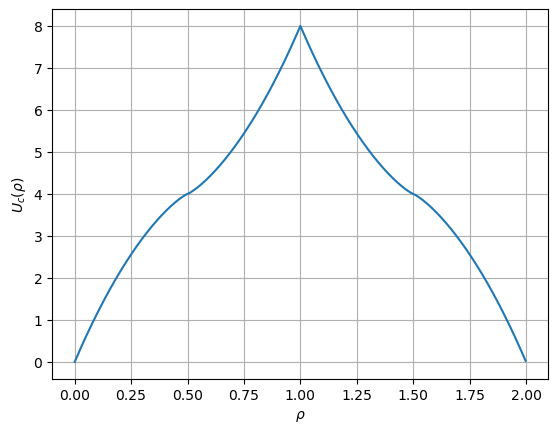

In [20]:
one_plot(rho_values, U_c_hk, r'$\rho$', r'$U_c(\rho)$', '')

#### State Diagram

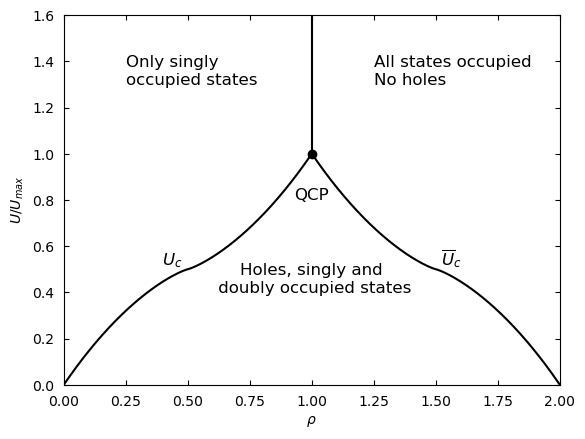

In [21]:
from matplotlib.ticker import MultipleLocator

U_c_hk_normalized = U_c_hk / (4*t*d)

def phase_diagram(x_values, y_values, x_label, y_label, y_max, title='none', legend=False, fill=True, alph=1):    
    # Create the plot
    fig, ax = plt.subplots()
    
    # Plot the dividing curve
    ax.plot(x_values, y_values, label=r'$U_c$', color='black')
    
    # Plot the vertical line at x = 1, starting from y=1 upwards
    ax.vlines(x=1, ymin=1, ymax=y_max, color='black', linestyle='-', label='MIT')
    
    # Fill areas for visualization (optional)
    if fill:
        ax.fill_between(x_values, y_values, y_max, where=(x_values < 1), 
                        interpolate=True, color='#DF1728', alpha=alph, label='Area 1')
        
        ax.fill_between(x_values, y_values, y_max, where=(x_values > 1), 
                        interpolate=True, color='#4E3DE1', alpha=alph, label='Area 2')
        
        ax.fill_between(x_values, 0, y_values, color='#B11CC2',
                         alpha=alph, label='Area 3 (Above Curve)')
    
    ax.plot(1, 1, marker='o', color='black', markersize=6, label='QCP')
    
    ax.text(1, 0.8, 'QCP', fontsize=12, color='black', ha='center')
    ax.text(0.25, 1.3, 'Only singly \noccupied states', fontsize=12, color='black', ha='left')
    ax.text(1.25, 1.3, 'All states occupied\nNo holes', fontsize=12, color='black', ha='left')
    ax.text(1, 0.4, 'Holes, singly and\n doubly occupied states', fontsize=12, color='black', ha='center')
    ax.text(0.48, 0.52, r'$U_c$', fontsize=12, color='black', ha='right')
    ax.text(1.52, 0.52, r'$\overline{U}_c$', fontsize=12, color='black', ha='left')
    
    # Labels and legend
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if title != 'none':
        ax.set_title(title)
    if legend == True:
        ax.legend()
    ax.set_xlim(0, 2)
    ax.set_ylim(0, y_max)
    ax.tick_params(top=True, right=True, direction='in', pad=7)
    # Set major tick intervals
    ax.xaxis.set_major_locator(MultipleLocator(0.25))  # x-axis ticks every 0.2 units
    ax.yaxis.set_major_locator(MultipleLocator(0.2))  # y-axis ticks every 0.5 units

    plt.show()
    
phase_diagram(rho_values, U_c_hk_normalized, r'$\rho$', r'$U / U_{max}$', 1.6, fill=False, alph=0.6)